In [10]:
import matplotlib.pyplot as plt
import numpy as np

IMAGE:   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

IMAGE SHAPE:  (1920, 1080, 3)


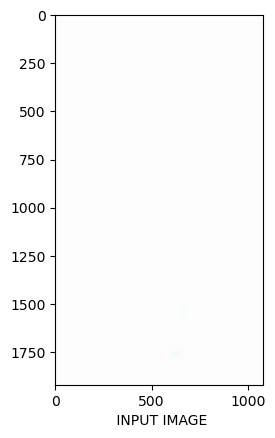

In [11]:

# read the image
image = np.array(plt.imread(r"whiteIMG.jpg"))
# Check the flags of the image
print("IMAGE:", image.flags)

print("IMAGE SHAPE: ", image.shape)
plt.xlabel(" INPUT IMAGE")
plt.imshow(image)


In [12]:
def dct(image):
    
    rowIMG, colIMG, numValues = image.shape
    dct = np.zeros(image.shape)
    
    print("IMAGE SHAPE: ", rowIMG,",", colIMG, ",", numValues)
    print("NEW IMG SHAPE: ", dct.shape)
    
dct(image)


IMAGE SHAPE:  1920 , 1080 , 3
NEW IMG SHAPE:  (1920, 1080, 3)


Enter text to be encoded: Maheen is hereeeeeeeeeee


C:\Users\mahee\AppData\Local\Temp\ipykernel_9232\2595721752.py:31: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 11111100 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  image[r][c][p] = int(new_bin_pixel)
C:\Users\mahee\AppData\Local\Temp\ipykernel_9232\2595721752.py:31: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 11111101 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  image[r][c][p] = int(new_bin_pixel)


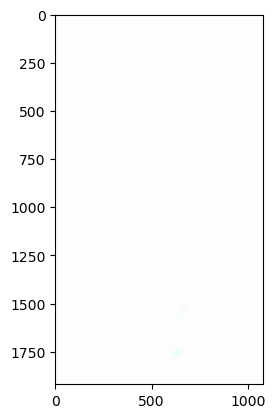

In [13]:
def to_bin(message): # convert message to binary
    binary_msg = ''
    for i in message:
        binary_msg += (str(bin(ord(i))[2:].zfill(8)).replace("0b",""))
    return binary_msg

# to encode
def hide_msg(bin_msg, image):
    
    messg = ""
    bin_msg = list(bin_msg)
    #print("Message in binary: ", bin_msg)
    
    idx = 0
    req_pixels = len(bin_msg)
    height, width, channels = image.shape
    if (height *width *channels) < req_pixels:
        print("Data size exceeds the file size, can't hide data...")
        return 
    
    for r in range(height):
        for c in range(width):
            for p in range(channels):
                if idx < req_pixels:
                    
                    bin_p = bin(image[r][c][p]).replace("0b","") #bin take int as parameter and returns a string
                    pix = list(bin_p)
                    pix[-1] = bin_msg[idx]
                    messg += str(bin_msg[idx])
                    new_bin_pixel = ''.join(pix)
                    image[r][c][p] = int(new_bin_pixel)
                    idx += 1

    return image, req_pixels

def decode_msg(image, message_length):
    msg = ""
    height, width, channels = image.shape
    idx = 0
    for r in range(height):
        for c in range(width):
            for p in range(channels):
                
                if idx > message_length:
                    break
                bin_p = bin(image[r][c][p]).replace("0b","") #bin take int as parameter and returns a string
                pix = list(bin_p)
                msg += str(pix[-1])
                idx += 1
                
            if idx > message_length:
                break
                
        if idx > message_length:
                break
                
    
    bit_limit_per_char  = 0  
    message = ""
    character = ''
    idx = 0
    
    for i in msg:
     
        if bit_limit_per_char == 8:
            
            message += chr(int(character, 2))
            character = ""
            bit_limit_per_char  = 0 
            
        character += i 
        bit_limit_per_char  += 1 
        
    return message
                
    
message = input("Enter text to be encoded: ")
bin_msg = to_bin(message)
image_encoded, message_length = hide_msg(bin_msg, image)

plt.imsave(r'outputIMG.bmp', image_encoded)
plt.imshow(image_encoded)



In [14]:
message = decode_msg(image_encoded, message_length)
print("Message decoded: ", message)

Message decoded:  Maheen is hereeeeeeeeeee
